In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings as wrn
from utils.helper import *
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
%matplotlib inline

In [2]:
DATA_PATH = "data/"
USERNAME = "Yuura Yozakura"

In [3]:
data = pd.read_csv(DATA_PATH + "Database Yuura Yozakura Content List - db.csv")
data.tail()

,id,title,views,date,url,game_name,content_name,topic,duration,start_stream,end_stream,note,Last Update
37,38,Lanjut Dimas Ukin,381,23-December-2022,https://www.youtube.com/watch?v=bAtLNkWhqU8,NaN,NaN,Game Dev,01:43:06,16:00,17:43,NaN,NaN
38,39,Reading YOUR Story: Choosen Title on Description!,555,25-December-2022,https://www.youtube.com/watch?v=OhhvLMM6M4I,NaN,Bed Time Story,Storytelling,03:01:04,21:00,00:01,NaN,NaN
39,40,Ga jadi peprwork pen main proseka,508,26-December-2022,https://www.youtube.com/watch?v=hrIoaiHk5eU,NaN,NaN,Game,02:34:18,16:00,18:34,"proseka, getting over it, parampaa",NaN
40,41,Speedrun ga siii,411,27-December-2022,https://www.youtube.com/watch?v=SuTE-wq0aDc,Parampaa Quiz,NaN,Game,02:36:58,19:30,22:06,NaN,NaN
41,42,Ga usah nonton ini,906,29-December-2022,https://youtu.be/Cx_woUGbx9M,NaN,Media Share,Free Talk,03:12:22,19:30,22:42,NaN,NaN


In [4]:
data.shape

(42, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            42 non-null     int64 
 1   title         42 non-null     object
 2   views         42 non-null     int64 
 3   date          42 non-null     object
 4   url           42 non-null     object
 5   game_name     13 non-null     object
 6   content_name  15 non-null     object
 7   topic         42 non-null     object
 8   duration      42 non-null     object
 9   start_stream  42 non-null     object
 10  end_stream    42 non-null     object
 11  note          3 non-null      object
 12  Last Update   2 non-null      object
dtypes: int64(2), object(11)
memory usage: 4.4+ KB


In [6]:
COLS = ['url', 'note', "Last Update"]

In [7]:
data.drop(COLS, axis=1, inplace=True)

### Impute missing values with `UNKNOWN` value

In [8]:
impute_missing_values(data=data, columns = ["game_name", "content_name"])

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream
0,1,uk ngobrol sambil kenalan lagi,429,30-September-2022,UNKNOWN,UNKNOWN,Free Talk,01:57:12,19:30,21:27
1,2,Reading you a bed time story,310,2-October-2022,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30,22:49
2,3,Ssssttt bisik aja kita biar ga kedengeran,357,6-October-2022,UNKNOWN,UNKNOWN,Free Talk,01:37:32,20:30,22:07
3,4,Pokoknya horror game aja,320,7-October-2022,UNKNOWN,UNKNOWN,Game,01:49:56,21:00,22:49
4,5,"Katanya sih mo lanjut reaksi, tpi ga tau deh s...",712,13-October-2022,UNKNOWN,UNKNOWN,Free Talk,01:59:02,20:00,21:59
5,6,Continue to read you a bed time story,233,16-October-2022,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00,22:16
6,7,Selamat datang di dunia tipu tipu,487,19-October-2022,UNKNOWN,Meme Review,Free Talk,01:56:36,20:30,22:26
7,8,Gaming Corner: Mencoba gamenya kak Ethel!!,243,21-October-2022,Boxes,UNKNOWN,Game,01:23:18,19:00,20:23
8,9,YUURAOKE!!! Permisi mo ngamen,482,22-October-2022,UNKNOWN,UNKNOWN,Karaoke,02:30:57,14:00,16:30
9,10,Guerilla Gaming Corner: bukan part 2,251,23-October-2022,Boxes,UNKNOWN,Game,01:33:26,12:30,14:03


In [9]:
data.isna().sum()

id              0
title           0
views           0
date            0
game_name       0
content_name    0
topic           0
duration        0
start_stream    0
end_stream      0
dtype: int64

### Convert Data into datetime

#### Get Days

In [10]:
convert_date_to_days(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days
0,1,uk ngobrol sambil kenalan lagi,429,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,01:57:12,19:30,21:27,Jum'at
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30,22:49,Minggu
2,3,Ssssttt bisik aja kita biar ga kedengeran,357,2022-10-06,UNKNOWN,UNKNOWN,Free Talk,01:37:32,20:30,22:07,Kamis
3,4,Pokoknya horror game aja,320,2022-10-07,UNKNOWN,UNKNOWN,Game,01:49:56,21:00,22:49,Jum'at
4,5,"Katanya sih mo lanjut reaksi, tpi ga tau deh s...",712,2022-10-13,UNKNOWN,UNKNOWN,Free Talk,01:59:02,20:00,21:59,Kamis
5,6,Continue to read you a bed time story,233,2022-10-16,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00,22:16,Minggu
6,7,Selamat datang di dunia tipu tipu,487,2022-10-19,UNKNOWN,Meme Review,Free Talk,01:56:36,20:30,22:26,Rabu
7,8,Gaming Corner: Mencoba gamenya kak Ethel!!,243,2022-10-21,Boxes,UNKNOWN,Game,01:23:18,19:00,20:23,Jum'at
8,9,YUURAOKE!!! Permisi mo ngamen,482,2022-10-22,UNKNOWN,UNKNOWN,Karaoke,02:30:57,14:00,16:30,Sabtu
9,10,Guerilla Gaming Corner: bukan part 2,251,2022-10-23,Boxes,UNKNOWN,Game,01:33:26,12:30,14:03,Minggu


#### Get Hours

In [11]:
get_hours(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
0,1,uk ngobrol sambil kenalan lagi,429,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,01:57:12,19:30:00,21:27,Jum'at,19
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30:00,22:49,Minggu,21
2,3,Ssssttt bisik aja kita biar ga kedengeran,357,2022-10-06,UNKNOWN,UNKNOWN,Free Talk,01:37:32,20:30:00,22:07,Kamis,20
3,4,Pokoknya horror game aja,320,2022-10-07,UNKNOWN,UNKNOWN,Game,01:49:56,21:00:00,22:49,Jum'at,21
4,5,"Katanya sih mo lanjut reaksi, tpi ga tau deh s...",712,2022-10-13,UNKNOWN,UNKNOWN,Free Talk,01:59:02,20:00:00,21:59,Kamis,20
5,6,Continue to read you a bed time story,233,2022-10-16,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00:00,22:16,Minggu,21
6,7,Selamat datang di dunia tipu tipu,487,2022-10-19,UNKNOWN,Meme Review,Free Talk,01:56:36,20:30:00,22:26,Rabu,20
7,8,Gaming Corner: Mencoba gamenya kak Ethel!!,243,2022-10-21,Boxes,UNKNOWN,Game,01:23:18,19:00:00,20:23,Jum'at,19
8,9,YUURAOKE!!! Permisi mo ngamen,482,2022-10-22,UNKNOWN,UNKNOWN,Karaoke,02:30:57,14:00:00,16:30,Sabtu,14
9,10,Guerilla Gaming Corner: bukan part 2,251,2022-10-23,Boxes,UNKNOWN,Game,01:33:26,12:30:00,14:03,Minggu,12


### Get count days for Livestream 

In [12]:
data["days"].value_counts()

Minggu    14
Kamis      8
Jum'at     5
Rabu       5
Sabtu      5
Selasa     3
Senin      2
Name: days, dtype: int64

In [13]:
print(f"Selama 3 bulan ini, Yuura sudah melakukan stream sebanyak {len(data.index)} kali")

Selama 3 bulan ini, Yuura sudah melakukan stream sebanyak 42 kali


### Plot Livestream Days in 3 months 

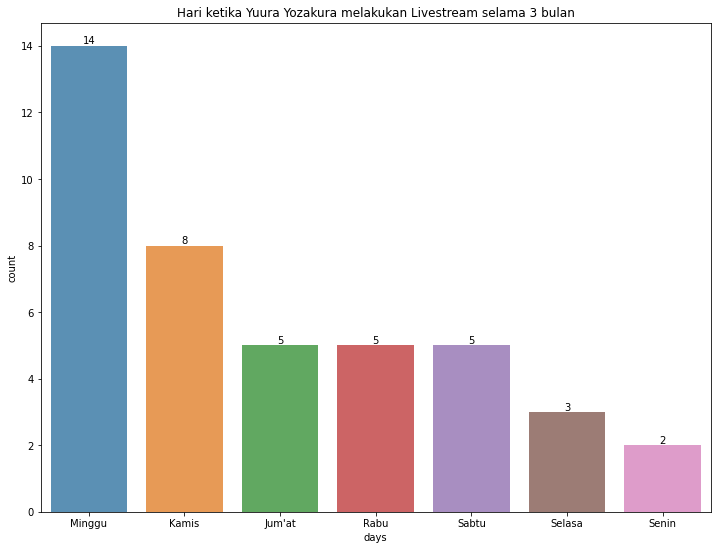

In [14]:
plot_count_days(data=data, username=USERNAME)

### Get Average Views based on Days

In [15]:
get_avg_days = round(data.groupby(["days"])['views'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [16]:
get_avg_days

days
Senin     430.00
Selasa    446.33
Rabu      465.00
Kamis     480.00
Jum'at    359.40
Sabtu     374.40
Minggu    343.86
Name: views, dtype: float64

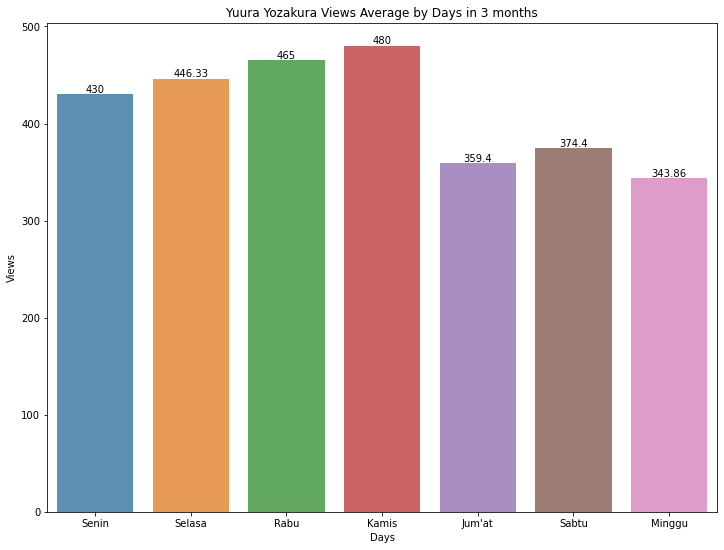

In [17]:
plot_avg_days_views(data=data,
                    var_name=get_avg_days,
                    username=USERNAME)

### Get count hours livestream 

In [18]:
data["hours"].value_counts()

19    14
21    11
20     6
16     4
13     2
14     1
12     1
8      1
22     1
18     1
Name: hours, dtype: int64

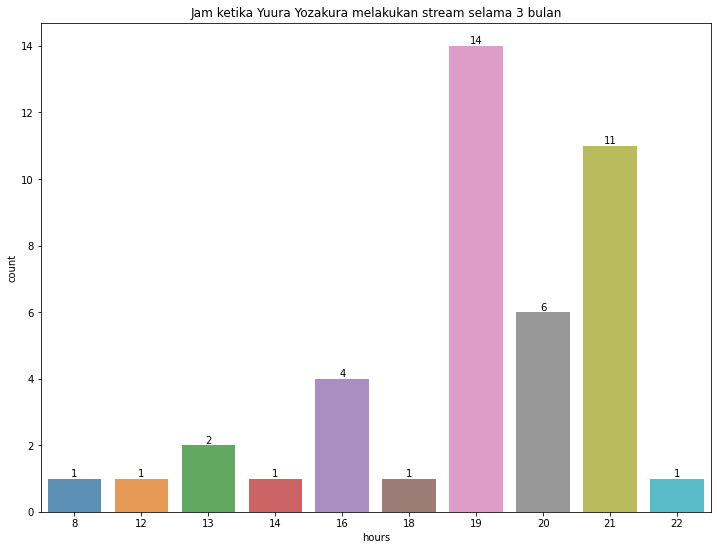

In [19]:
plot_count_hours(data=data, username=USERNAME)

### Trend Views in 3 months 

In [20]:
min(data["date"]), max(data["date"])

(Timestamp('2022-09-30 00:00:00'), Timestamp('2022-12-29 00:00:00'))

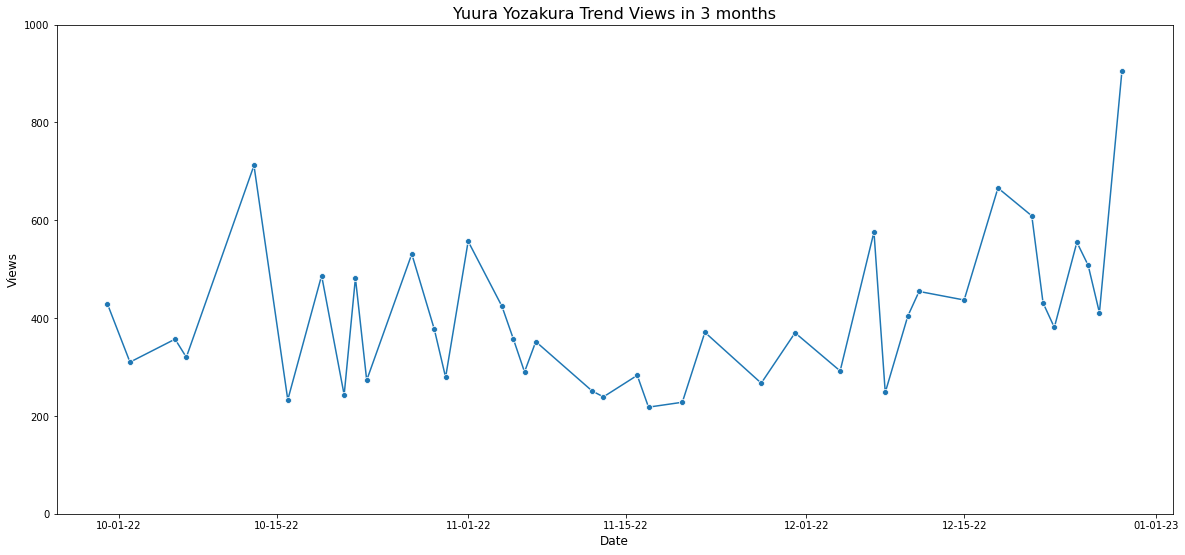

In [21]:
plot_trend_views(data=data, username=USERNAME, max_limit=1000)

In [22]:
min_views = min(data["views"])
min_views

218

In [23]:
data[data["views"] == min_views]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
22,23,Mencoba game puzzle aesthetic✨,218,2022-11-17,When The Past Around,UNKNOWN,Game,02:38:28,19:30:00,22:08,Kamis,19


In [24]:
max_views = max(data["views"])
max_views

906

In [25]:
data[data["views"] == max_views]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
41,42,Ga usah nonton ini,906,2022-12-29,UNKNOWN,Media Share,Free Talk,03:12:22,19:30:00,22:42,Kamis,19


### Views distribution 

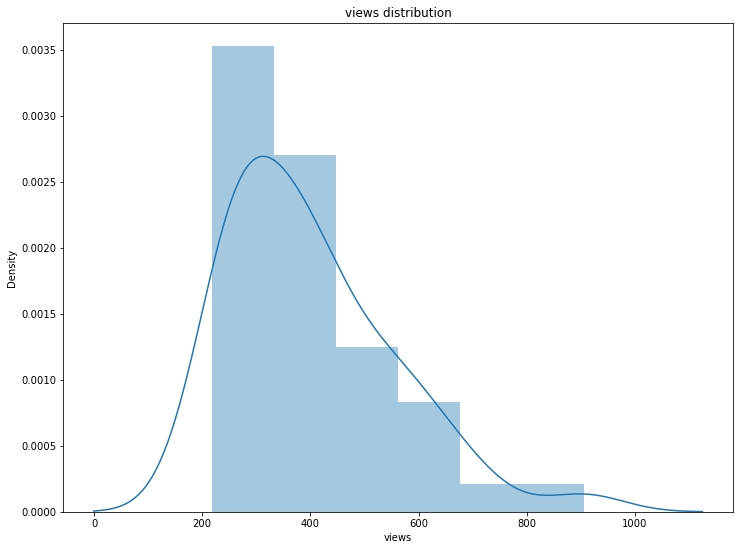

In [26]:
plot_distribution(data=data, col="views")

### Get average views 

In [27]:
mean = np.average(data['views'])
mean

401.1190476190476

### Get median views 

In [28]:
median = np.median(data['views'])
median

370.5

### Get average views in each hours

In [29]:
data.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
0,1,uk ngobrol sambil kenalan lagi,429,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,01:57:12,19:30:00,21:27,Jum'at,19
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30:00,22:49,Minggu,21
2,3,Ssssttt bisik aja kita biar ga kedengeran,357,2022-10-06,UNKNOWN,UNKNOWN,Free Talk,01:37:32,20:30:00,22:07,Kamis,20
3,4,Pokoknya horror game aja,320,2022-10-07,UNKNOWN,UNKNOWN,Game,01:49:56,21:00:00,22:49,Jum'at,21
4,5,"Katanya sih mo lanjut reaksi, tpi ga tau deh s...",712,2022-10-13,UNKNOWN,UNKNOWN,Free Talk,01:59:02,20:00:00,21:59,Kamis,20


In [30]:
avg_views_hours = round(data.groupby(['hours'])["views"].mean(), 2)

In [31]:
avg_views_hours

hours
8     358.00
12    251.00
13    645.50
14    482.00
16    422.50
18    352.00
19    424.00
20    482.50
21    300.18
22    290.00
Name: views, dtype: float64

### Plot Average Views in each Hours

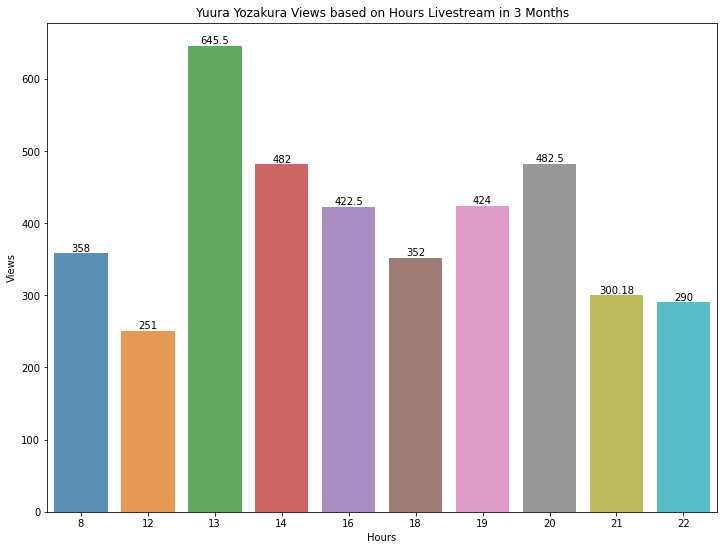

In [32]:
plot_avg_views_hours(data=data, var_name=avg_views_hours, username=USERNAME)

### Convert Timestamp duration to Minutes

In [33]:
convert_timestamp_to_minutes(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,uk ngobrol sambil kenalan lagi,429,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,01:57:12,19:30:00,21:27,Jum'at,19,117.20
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30:00,22:49,Minggu,21,79.63
2,3,Ssssttt bisik aja kita biar ga kedengeran,357,2022-10-06,UNKNOWN,UNKNOWN,Free Talk,01:37:32,20:30:00,22:07,Kamis,20,97.53
3,4,Pokoknya horror game aja,320,2022-10-07,UNKNOWN,UNKNOWN,Game,01:49:56,21:00:00,22:49,Jum'at,21,109.93
4,5,"Katanya sih mo lanjut reaksi, tpi ga tau deh s...",712,2022-10-13,UNKNOWN,UNKNOWN,Free Talk,01:59:02,20:00:00,21:59,Kamis,20,119.03
5,6,Continue to read you a bed time story,233,2022-10-16,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00:00,22:16,Minggu,21,76.50
6,7,Selamat datang di dunia tipu tipu,487,2022-10-19,UNKNOWN,Meme Review,Free Talk,01:56:36,20:30:00,22:26,Rabu,20,116.60
7,8,Gaming Corner: Mencoba gamenya kak Ethel!!,243,2022-10-21,Boxes,UNKNOWN,Game,01:23:18,19:00:00,20:23,Jum'at,19,83.30
8,9,YUURAOKE!!! Permisi mo ngamen,482,2022-10-22,UNKNOWN,UNKNOWN,Karaoke,02:30:57,14:00:00,16:30,Sabtu,14,150.95
9,10,Guerilla Gaming Corner: bukan part 2,251,2022-10-23,Boxes,UNKNOWN,Game,01:33:26,12:30:00,14:03,Minggu,12,93.43


### Average per minutes

In [34]:
mean_duration = np.average(data['convert_duration_minutes'])

# di convert jadi hours lagi?
round(mean_duration / 60, 2)

2.26

### Distribution Plot Stream Duration 

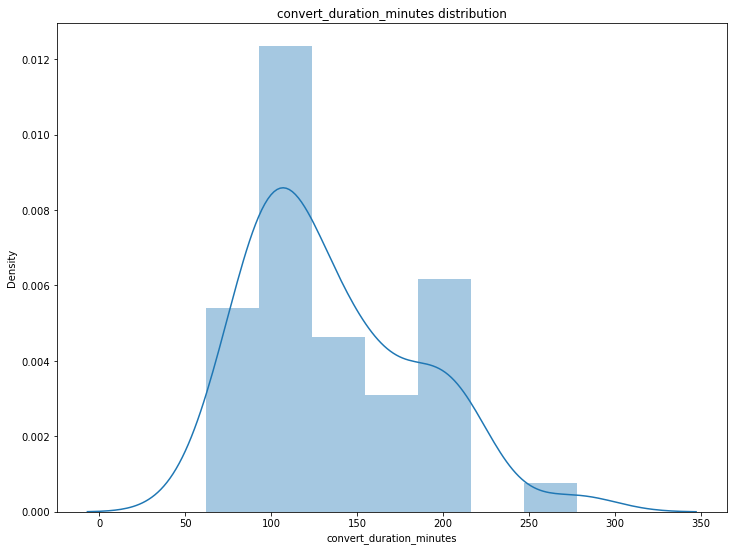

In [35]:
plot_distribution(data=data, col="convert_duration_minutes")

### Get average Stream Duration by Days 

In [36]:
avg_stream_duration_days = round(data.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]) / 60, 2)

In [37]:
avg_stream_duration_days

days
Senin     1.99
Selasa    2.37
Rabu      2.85
Kamis     2.59
Jum'at    1.77
Sabtu     2.89
Minggu    1.84
Name: convert_duration_minutes, dtype: float64

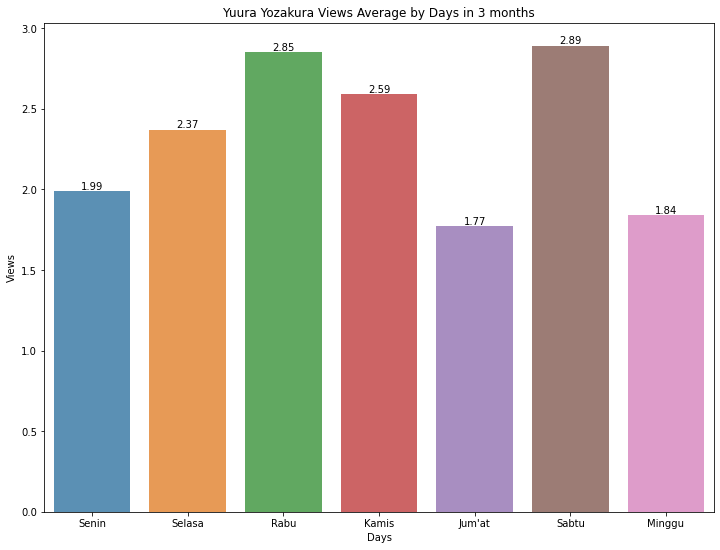

In [38]:
plot_avg_days_views(data=data, var_name=avg_stream_duration_days, username=USERNAME)

In [39]:
data[data["days"] == "Sabtu"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
8,9,YUURAOKE!!! Permisi mo ngamen,482,2022-10-22,UNKNOWN,UNKNOWN,Karaoke,02:30:57,14:00:00,16:30,Sabtu,14,150.95
12,13,Guerilla Gaming Corner: maju sini lo rhythm game,377,2022-10-29,Muse Dash,UNKNOWN,Game,03:14:52,16:15:00,19:29,Sabtu,16,194.87
16,17,Gutten morgen para makhluk hidup,358,2022-11-05,UNKNOWN,UNKNOWN,Free Talk,01:53:00,08:00:00,09:53,Sabtu,8,113.00
19,20,Malming ayo nonton bareng!!! aku ada kuaci ama...,251,2022-11-12,UNKNOWN,UNKNOWN,Watchalong,02:11:34,20:00:00,22:11,Sabtu,20,131.57
30,31,Guerilla Stream: Gaming Corner. Daru dulu peng...,404,2022-12-10,Ann,UNKNOWN,Game,04:38:03,19:30:00,00:08,Sabtu,19,278.05


In [40]:
data[data["days"] == "Rabu"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
6,7,Selamat datang di dunia tipu tipu,487,2022-10-19,UNKNOWN,Meme Review,Free Talk,01:56:36,20:30:00,22:26,Rabu,20,116.60
21,22,Kuitung aku main ini sejam aja yak,283,2022-11-16,Everybody Must Die,UNKNOWN,Game,02:06:34,19:00:00,21:06,Rabu,19,126.57
26,27,Speedrun ikz; lemme show you how beeg my brain is,370,2022-11-30,Helltaker,UNKNOWN,Game,03:20:38,19:00:00,22:20,Rabu,19,200.63
28,29,Pengen coba tes personality online ga si,576,2022-12-07,UNKNOWN,UNKNOWN,Free Talk,03:35:20,19:30:00,23:05,Rabu,19,215.33
35,36,lets talk about childhood?,609,2022-12-21,UNKNOWN,UNKNOWN,Free Talk,03:16:40,19:30:00,22:46,Rabu,19,196.67


In [41]:
data[data["days"] == "Minggu"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30:00,22:49,Minggu,21,79.63
5,6,Continue to read you a bed time story,233,2022-10-16,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00:00,22:16,Minggu,21,76.50
9,10,Guerilla Gaming Corner: bukan part 2,251,2022-10-23,Boxes,UNKNOWN,Game,01:33:26,12:30:00,14:03,Minggu,12,93.43
10,11,Reading you The Story of Momotaro until you fe...,295,2022-10-23,UNKNOWN,Bed Time Story,Storytelling,01:32:36,21:30:00,23:02,Minggu,21,92.60
13,14,Reading you The Story of SaruKani until you fe...,279,2022-10-30,UNKNOWN,Bed Time Story,Storytelling,01:42:16,21:00:00,22:42,Minggu,21,102.27
17,18,Reading you Story until you fall asleep,290,2022-11-06,UNKNOWN,Bed Time Story,Storytelling,01:34:18,22:00:00,23:34,Minggu,22,94.30
20,21,Reading you Story: ちからたろう until you fall asleep,239,2022-11-13,UNKNOWN,Bed Time Story,Storytelling,01:41:06,21:00:00,22:41,Minggu,21,101.10
23,24,Reading you Story: つるのおんがえし until you fall asleep,228,2022-11-20,UNKNOWN,Bed Time Story,Storytelling,01:36:32,21:00:00,22:36,Minggu,21,96.53
25,26,Reading you Story:うらしまたろう until you fall asleep,267,2022-11-27,UNKNOWN,Bed Time Story,Storytelling,02:00:07,21:45:00,23:45,Minggu,21,120.12
27,28,Reading YOUR Story: Me and My Livium,292,2022-12-04,UNKNOWN,Bed Time Story,Storytelling,01:29:48,21:00:00,22:29,Minggu,21,89.80


In [42]:
data[data["convert_duration_minutes"] == max(data["convert_duration_minutes"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
30,31,Guerilla Stream: Gaming Corner. Daru dulu peng...,404,2022-12-10,Ann,UNKNOWN,Game,04:38:03,19:30:00,00:08,Sabtu,19,278.05


In [43]:
data[data["convert_duration_minutes"] == min(data["convert_duration_minutes"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
32,33,Reading YOUR Story: Choosen Title on Description!,284,2022-12-11,UNKNOWN,Bed Time Story,Storytelling,01:02:06,21:00:00,22:02,Minggu,21,62.1


### Check Correlation

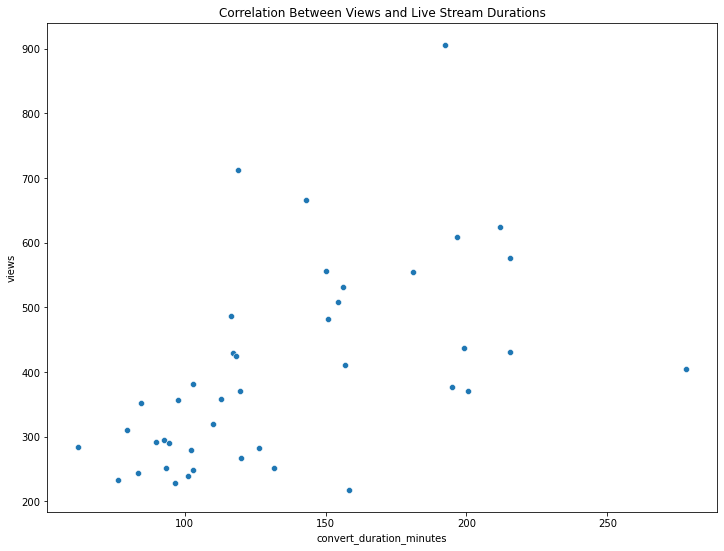

In [44]:
plot_correlation(data=data)

- Berdasarkan hasil scatter plot dapat dilihat, kalo Yuura melakukan livestream di durasi 100-130 an menit. Terlihat disitu terdapat cluster

### Yuura Livestream Topics 

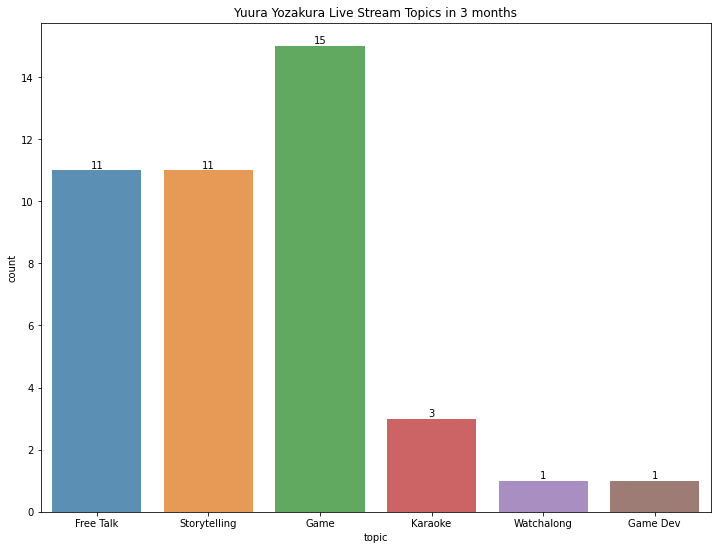

In [46]:
plot_livestream_topic(data=data, col_name="topic", username=USERNAME)

### Storytelling Topic 

In [54]:
storytelling = data[data["topic"] == "Storytelling"]

In [55]:
storytelling.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30:00,22:49,Minggu,21,79.63
5,6,Continue to read you a bed time story,233,2022-10-16,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00:00,22:16,Minggu,21,76.50
10,11,Reading you The Story of Momotaro until you fe...,295,2022-10-23,UNKNOWN,Bed Time Story,Storytelling,01:32:36,21:30:00,23:02,Minggu,21,92.60
13,14,Reading you The Story of SaruKani until you fe...,279,2022-10-30,UNKNOWN,Bed Time Story,Storytelling,01:42:16,21:00:00,22:42,Minggu,21,102.27
17,18,Reading you Story until you fall asleep,290,2022-11-06,UNKNOWN,Bed Time Story,Storytelling,01:34:18,22:00:00,23:34,Minggu,22,94.30


In [57]:
storytelling[storytelling["views"] == max(storytelling["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
38,39,Reading YOUR Story: Choosen Title on Description!,555,2022-12-25,UNKNOWN,Bed Time Story,Storytelling,03:01:04,21:00:00,00:01,Minggu,21,181.07


In [58]:
storytelling[storytelling["views"] == min(storytelling["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
23,24,Reading you Story: つるのおんがえし until you fall asleep,228,2022-11-20,UNKNOWN,Bed Time Story,Storytelling,01:36:32,21:00:00,22:36,Minggu,21,96.53


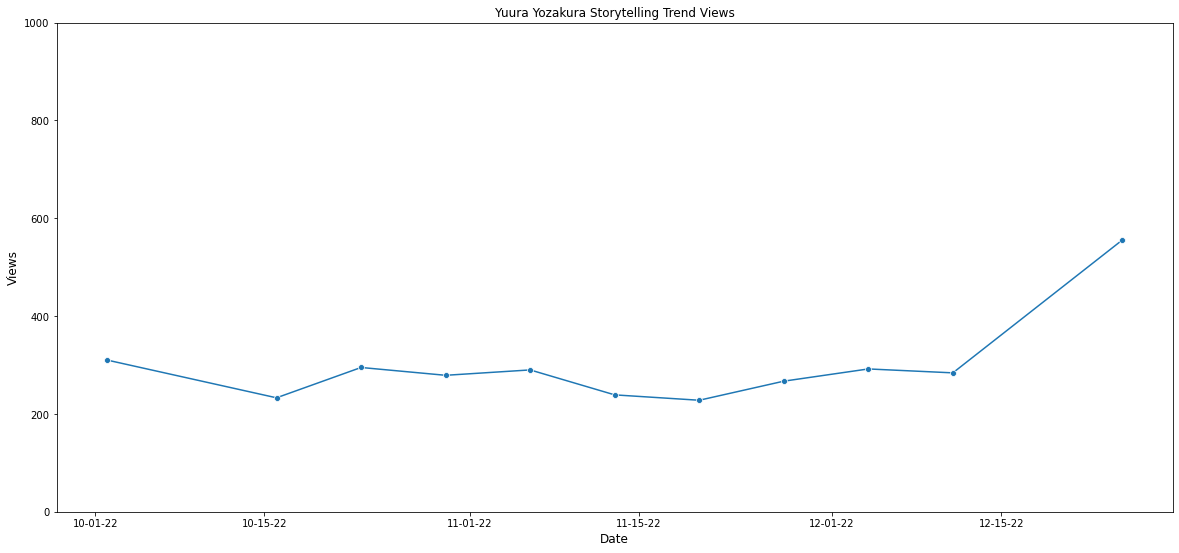

In [64]:
from matplotlib.dates import DateFormatter
plt.figure(figsize=(20,9))
ax = sns.lineplot(x = "date", y = "views", data=storytelling, marker='o', ci=None)
plt.ylim(0, 1000)
plt.title('Yuura Yozakura Storytelling Trend Views', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
# plt.show()
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

### Game Topic 

In [65]:
data_game = data[data['topic'] == 'Game']

In [66]:
data_game.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
3,4,Pokoknya horror game aja,320,2022-10-07,UNKNOWN,UNKNOWN,Game,01:49:56,21:00:00,22:49,Jum'at,21,109.93
7,8,Gaming Corner: Mencoba gamenya kak Ethel!!,243,2022-10-21,Boxes,UNKNOWN,Game,01:23:18,19:00:00,20:23,Jum'at,19,83.30
9,10,Guerilla Gaming Corner: bukan part 2,251,2022-10-23,Boxes,UNKNOWN,Game,01:33:26,12:30:00,14:03,Minggu,12,93.43
12,13,Guerilla Gaming Corner: maju sini lo rhythm game,377,2022-10-29,Muse Dash,UNKNOWN,Game,03:14:52,16:15:00,19:29,Sabtu,16,194.87
15,16,Guerilla Gaming Corner: Mainin game yang dikas...,424,2022-11-04,Getting Over It,UNKNOWN,Game,01:58:11,16:45:00,18:43,Jum'at,16,118.18


### Game List 

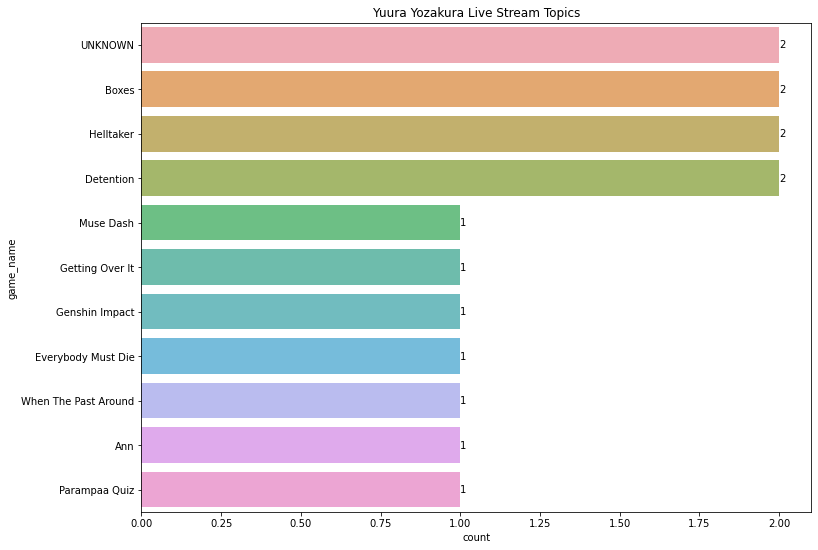

In [68]:
plt.figure(figsize=(12,9))
plt.title(f'{USERNAME} Live Stream Topics')
ax = sns.countplot(y=data_game['game_name'], alpha=0.8, order = data_game['game_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [69]:
data_game[data_game["views"] == max(data_game["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
39,40,Ga jadi peprwork pen main proseka,508,2022-12-26,UNKNOWN,UNKNOWN,Game,02:34:18,16:00:00,18:34,Senin,16,154.3


In [70]:
data_game[data_game["views"] == min(data_game["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
22,23,Mencoba game puzzle aesthetic✨,218,2022-11-17,When The Past Around,UNKNOWN,Game,02:38:28,19:30:00,22:08,Kamis,19,158.47


### Content Name

In [71]:
data_content = data[data["content_name"] != "UNKNOWN"]

In [72]:
data_content["content_name"].unique()

array(['Bed Time Story', 'Meme Review', 'Food Review', 'Yozakura Casino',
       'Media Share'], dtype=object)

In [73]:
data_content.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
1,2,Reading you a bed time story,310,2022-10-02,UNKNOWN,Bed Time Story,Storytelling,01:19:38,21:30:00,22:49,Minggu,21,79.63
5,6,Continue to read you a bed time story,233,2022-10-16,UNKNOWN,Bed Time Story,Storytelling,01:16:30,21:00:00,22:16,Minggu,21,76.50
6,7,Selamat datang di dunia tipu tipu,487,2022-10-19,UNKNOWN,Meme Review,Free Talk,01:56:36,20:30:00,22:26,Rabu,20,116.60
10,11,Reading you The Story of Momotaro until you fe...,295,2022-10-23,UNKNOWN,Bed Time Story,Storytelling,01:32:36,21:30:00,23:02,Minggu,21,92.60
11,12,Menilai masakan kalian,531,2022-10-27,UNKNOWN,Food Review,Free Talk,02:36:04,20:30:00,23:06,Kamis,20,156.07


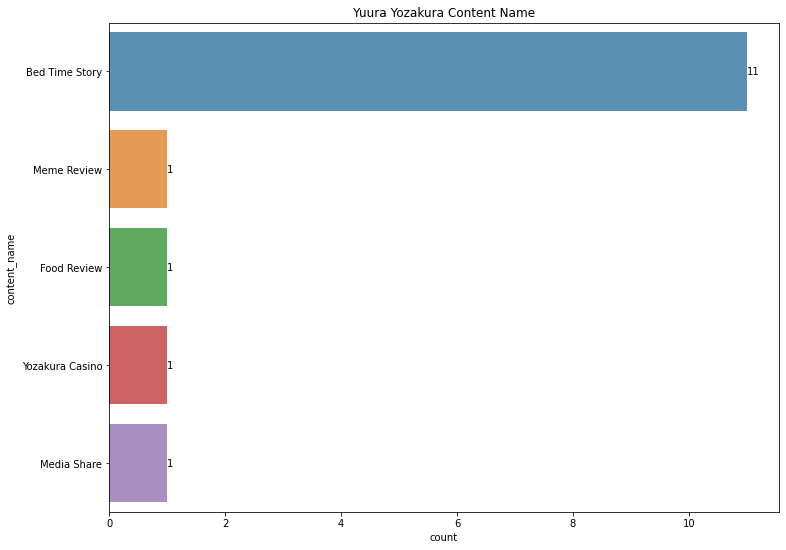

In [74]:
plt.figure(figsize=(12,9))
plt.title(f'{USERNAME} Content Name')
ax = sns.countplot(y=data_content['content_name'], alpha=0.8, order = data_content['content_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()